# Using EsgpullAPI for File Search and Download

This notebook demonstrates how to use the `EsgpullAPI` to search for climate data files and download them programmatically using `esgpull`. The API now directly mirrors the CLI logic, so all notebook operations are robust and consistent with the command line.

## Setup

Import the EsgpullAPI and initialize it. By default, it will use your esgpull config file (e.g., `~/.config/esgpull/config.toml`). You can specify a custom config path if needed.

In [22]:
import xarray as xa
import numpy as np
ds = xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Omon/tos/gn/v20200630/tos_Omon_TaiESM1_historical_r1i1p1f1_gn_191001-191012.nc")
ds

<xarray.Dataset> Size: 16MB
Dimensions:             (time: 12, bnds: 2, j: 384, i: 320, vertices: 4)
Coordinates:
  * time                (time) object 96B 1910-01-16 12:00:00 ... 1910-12-16 ...
  * j                   (j) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
    latitude            (j, i) float64 983kB ...
    longitude           (j, i) float64 983kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object 192B ...
    vertices_latitude   (j, i, vertices) float64 4MB ...
    vertices_longitude  (j, i, vertices) float64 4MB ...
    tos                 (time, j, i) float32 6MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Hybrid-restart from year 0671-01-01 of piControl
    branch_time_in_child:   0.0
    branch_time_in_parent:  171550.0
    contact:                Dr. Wei-Liang Lee (leelupin@gate.sinica.edu.tw)
    ...                     ...
    title:                  TaiESM1 output prepared for CMIP6
    variable_id:            tos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by REQUIRED is licensed...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/b25130de-313c-43f5-8d2a-712e447a673a

In [20]:
lons = np.ascontiguousarray(ds['lon'].values)
lats = np.ascontiguousarray(ds['lat'].values)
xa.Dataset({'lon': (['x'], lons), 'lat': (['y'], lats)})

<xarray.Dataset> Size: 4kB
Dimensions:  (x: 360, y: 180)
Dimensions without coordinates: x, y
Data variables:
    lon      (x) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat      (y) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

In [25]:
from pathlib import Path
egfp = Path("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-AerChem/historical/r1i1p1f1/Omon/tos/gn/v20200624/tos_Omon_EC-Earth3-AerChem_historical_r1i1p1f1_gn_198501-198512.nc")

# get highest 6 levels of the fp via pathlib
Path(*egfp.parts[-6:])

PosixPath('r1i1p1f1/Omon/tos/gn/v20200624/tos_Omon_EC-Earth3-AerChem_historical_r1i1p1f1_gn_198501-198512.nc')

In [11]:
xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-AerChem/historical/r1i1p1f1/Omon/tos/gn/v20200624/tos_Omon_EC-Earth3-AerChem_historical_r1i1p1f1_gn_198501-198512.nc")

<xarray.Dataset> Size: 14MB
Dimensions:             (time: 12, bnds: 2, j: 292, i: 362, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 96B 1985-01-16T12:00:00 ... 198...
  * j                   (j) int32 1kB 1 2 3 4 5 6 7 ... 287 288 289 290 291 292
  * i                   (i) int32 1kB 1 2 3 4 5 6 7 ... 357 358 359 360 361 362
    latitude            (j, i) float64 846kB ...
    longitude           (j, i) float64 846kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 192B ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
    tos                 (time, j, i) float32 5MB ...
Attributes: (12/46)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    variable_id:                        tos
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0
    history:                            2020-06-15T11:51:22Z ; CMOR rewrote d...
    latest_applied_cmor_fixer_version:  v3.0

In [ ]:
%reload_ext autoreload
%autoreload 2

from esgpull.api import EsgpullAPI
import json

# Initialize EsgpullAPI (uses default config search)
api = EsgpullAPI()
fs = api.esg.fs

from esgpull import custom

# custom.main()

/Users/rt582/miniforge3/envs/esgpull-plus/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Loaded search results from cache: /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/search_results/SEARCH_200_CMIP6_historical_mon_r1i1p1f1_tos.csv
Attempting download of 200 files...



Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Download Summary:
Down

RecursionError: maximum recursion depth exceeded

In [ ]:
xa.open_dataset(")

<xarray.Dataset> Size: 16MB
Dimensions:             (time: 12, bnds: 2, j: 384, i: 320, vertices: 4)
Coordinates:
  * time                (time) object 96B 1932-01-16 12:00:00 ... 1932-12-16 ...
  * j                   (j) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
    latitude            (j, i) float64 983kB ...
    longitude           (j, i) float64 983kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object 192B ...
    vertices_latitude   (j, i, vertices) float64 4MB ...
    vertices_longitude  (j, i, vertices) float64 4MB ...
    tos                 (time, j, i) float32 6MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Hybrid-restart from year 0671-01-01 of piControl
    branch_time_in_child:   0.0
    branch_time_in_parent:  171550.0
    contact:                Dr. Wei-Liang Lee (leelupin@gate.sinica.edu.tw)
    ...                     ...
    title:                  TaiESM1 output prepared for CMIP6
    variable_id:            tos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by REQUIRED is licensed...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/64df5413-da9e-4d42-854d-24d7aa6cf044

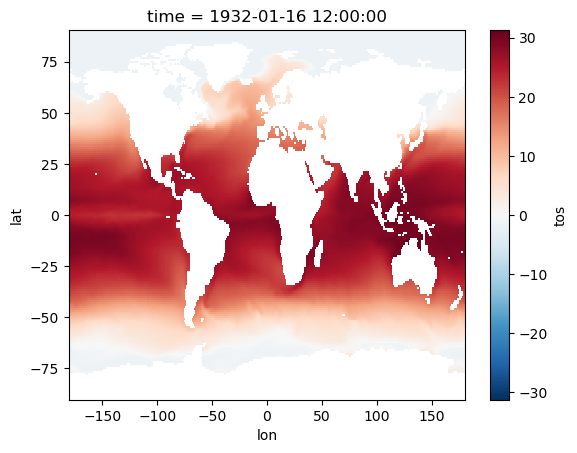

In [8]:
import xarray as xa
test = xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Omon/tos/gn/v20200630/reprojected/tos_Omon_TaiESM1_historical_r1i1p1f1_gn_193201-193212.nc")
test.tos.isel(time=0).plot()

In [9]:
test.load()

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 12, lat: 181, lon: 361)
Coordinates:
  * time     (time) object 96B 1932-01-16 12:00:00 ... 1932-12-16 12:00:00
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
Data variables:
    tos      (time, lat, lon) float32 3MB nan nan nan nan ... -1.8 -1.8 -1.8
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Hybrid-restart from year 0671-01-01 of piControl
    branch_time_in_child:   0.0
    branch_time_in_parent:  171550.0
    contact:                Dr. Wei-Liang Lee (leelupin@gate.sinica.edu.tw)
    ...                     ...
    title:                  TaiESM1 output prepared for CMIP6
    variable_id:            tos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by REQUIRED is licensed...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/64df5413-da9e-4d42-854d-24d7aa6cf044

In [ ]:
import xarray as xa
xa.open_dataset("https://esgf.bsc.es/thredds/fileServer/esg_dataroot/a3bh-CMIP-r1/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-CC/historical/r1i1p1f1/Amon/tos/gr/v20210113/tos_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_186201-186212.nc", engine="h5netcdf", decode_times=False)

FileNotFoundError: https://esgf.bsc.es/thredds/fileServer/esg_dataroot/a3bh-CMIP-r1/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-CC/historical/r1i1p1f1/Amon/tos/gr/v20210113/tos_Amon_EC-Earth3-CC_historical_r1i1p1f1_gr_186201-186212.nc

In [85]:
from esgpull.api import EsgpullAPI

# Add a query
api = EsgpullAPI()
api.add({"project": "CMIP6", "experiment_id": "historical", "variable": "tas", "frequency": "mon", "name": "test_query"}, track=False)

# Re-instantiate the API (simulates a new session)
api2 = EsgpullAPI()
queries = api2.list_queries()
print([q["name"] for q in queries])

Skipping existing query: <1d6856>
No new query was added.
['<1d6856>', '<5e0f39>', '<aec421>', '<d0250b>', '<f91a91>']


In [ ]:
from sqlalchemy import text

result = session.execute(text("SELECT * FROM query")).fetchall()
print(result)


In [ ]:
api.esg.db.url

## 1. Search for Files

Define your search criteria as a dictionary. The keys correspond to ESGF facets (e.g., project, experiment_id, variable, frequency). The 'limit' key restricts the number of results.

In [ ]:
search_criteria

In [ ]:
%reload_ext autoreload
%autoreload 2

from esgpull.api import EsgpullAPI
from esgpull import custom
import json
import pandas as pd
from esgpull.models.file import FileDict
from esgpull.models.query import File
from esgpull.fs import Filesystem

import dask
import xarray as xa
import os

# Initialize EsgpullAPI (uses default config search)
api = EsgpullAPI()

search_criteria = custom.read_yaml("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/esgpullplus/search.yaml")['search_criteria']
meta_criteria = custom.read_yaml("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/esgpullplus/search.yaml")['meta_criteria']
search_criteria['limit'] = meta_criteria['limit'] if 'limit' in meta_criteria else None

results = api.search(criteria=search_criteria)
print(f"Found {len(results)} file(s).")
for i, result in enumerate(results[:3]):
    print(f"\nResult {i+1}:")
    print(json.dumps(result, indent=2))
    
results_df = pd.DataFrame(results)

In [15]:
import xarray as xa
import xesmf as xe
import numpy as np
from pathlib import Path
import hashlib


class RegridderManager:
    def __init__(self, fs, ds, target_res=(1.0, 1.0), periodic=True):
        """
        ds: xarray.Dataset with native curvilinear ocean grid
        target_res: resolution as (lon_res, lat_res)
        weight_dir: optional path to save/load weights
        """
        self.fs = fs
        self.ds = ds.load()
        self.periodic = periodic
        self.target_res = target_res

        # Parse and rename dims to match xesmf expectations
        self.ds = self._standardize_dims(self.ds)
        self.ds = self._standardize_coords(self.ds)
        self.weight_dir = self.fs.data / "xesmf_regrid_weights"
        self.weight_dir.mkdir(exist_ok=True)

        self.regridder = self._get_or_create_regridder()

    def _standardize_dims(self, ds):
        # Robustly assign 'x' to longitude and 'y' to latitude, even if i/j are swapped
        dim_map = {}
        dims = list(ds.dims)
        # If both i and j are present, decide which is x (lon) and which is y (lat) by shape
        if 'i' in dims and 'j' in dims:
            i_len = ds.sizes['i']
            j_len = ds.sizes['j']
            # Longitude usually has more points than latitude
            if i_len > j_len:
                dim_map['i'] = 'x'  # i is longitude
                dim_map['j'] = 'y'  # j is latitude
            else:
                dim_map['i'] = 'y'  # i is latitude
                dim_map['j'] = 'x'  # j is longitude
        else:
            if 'i' in dims: dim_map['i'] = 'y'
            if 'j' in dims: dim_map['j'] = 'x'
        return ds.rename_dims(dim_map)

    def _standardize_coords(self, ds):
        # Ensure 'lat' and 'lon' are present and correctly named
        ds = ds.rename({'latitude': 'lat'}) if 'latitude' in ds.coords else ds
        ds = ds.rename({'longitude': 'lon'}) if 'longitude' in ds.coords else ds
        return ds

    def _make_grid_in(self):
        lon2d = self.ds['lon'].values
        lat2d = self.ds['lat'].values
        return xa.Dataset({'lon': (['y', 'x'], lon2d), 'lat': (['y', 'x'], lat2d)})

    def _make_grid_out(self):
        lon_res, lat_res = self.target_res
        target_lon = np.arange(-180, 180 + lon_res, lon_res)
        target_lat = np.arange(-90, 90 + lat_res, lat_res)
        return xa.Dataset({'lon': (['lon'], target_lon), 'lat': (['lat'], target_lat)})

    def _weights_filename(self):
        # Hash the shape of input grid to ensure reuse
        id_str = f"{self.ds['lon'].shape}-{self.target_res}"
        hex_hash = hashlib.md5(id_str.encode()).hexdigest()
        
        return self.weight_dir / f"regrid_weights_{hex_hash}.nc"

    def _get_or_create_regridder(self):
        grid_in = self._make_grid_in()
        grid_out = self._make_grid_out()
        weights_path = self._weights_filename()

        if weights_path.exists():
            return xe.Regridder(grid_in, grid_out,
                                method='bilinear',
                                periodic=self.periodic,
                                # filename=weights_path,
                                # reuse_weights=False
                                )
        else:
            return xe.Regridder(grid_in, grid_out,
                                method='bilinear',
                                periodic=self.periodic,
                                ignore_degenerate=True,
                                filename=weights_path)

    def regrid(self, varname, time_index=None):
        data = self.ds[varname]
        if time_index is not None:
            data = data.isel(time=time_index)

        data = data.where(np.isfinite(data), drop=False)
        return self.regridder(data)


data_dir = Path("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114")
output_dir = data_dir / "regridded"
output_dir.mkdir(exist_ok=True)
nc_files = sorted(data_dir.glob("*.nc"))[2:]

for fpath in nc_files:
    print(f"Processing {fpath.name}")
    ds = xa.open_dataset(fpath)
    regrid_path = output_dir / f"{fpath.stem}_regridded.nc"
    if regrid_path.exists():
        print(f"Skipping {fpath.name}, already regridded.")
        continue
    else:
        regrid_mgr = RegridderManager(fs, ds)
        varname = 'ph'
        out = regrid_mgr.regrid(varname)
        out.to_netcdf(regrid_path)

Processing ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_189001-190912.nc


ValueError: ESMC_GridCreate() failed with rc = 545.    Please check the log files (named "*ESMF_LogFile").

In [14]:
nc_files

[PosixPath('/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-186912.nc'),
 PosixPath('/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_187001-188912.nc'),
 PosixPath('/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_189001-190912.nc'),
 PosixPath('/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_

In [95]:
ds = xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-186912.nc").isel(time=0)
ds.load()

<xarray.Dataset> Size: 9MB
Dimensions:             (bnds: 2, i: 292, j: 362, vertices: 4)
Coordinates:
    time                object 8B 1850-01-16 12:00:00
    lev                 float64 8B 0.5126
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 286 287 288 289 290 291
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 356 357 358 359 360 361
    latitude            (i, j) float64 846kB -78.39 -78.39 ... 50.01 50.01
    longitude           (i, j) float64 846kB 72.5 73.5 74.5 ... 73.04 73.0 72.99
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (bnds) object 16B 1850-01-01 00:00:00 1850-02-01 00:0...
    lev_bnds            (bnds) float64 16B 0.0 1.052
    vertices_latitude   (i, j, vertices) float64 3MB -78.39 -78.39 ... 49.98
    vertices_longitude  (i, j, vertices) float64 3MB 72.5 72.5 ... 72.95 73.0
    ph                  (i, j) float32 423kB nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            ph
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/5ab1528a-4b33-49a5-867c-1a08ad6a5895

In [97]:
ds.data_vars

Data variables:
    time_bnds           (bnds) object 16B 1850-01-01 00:00:00 1850-02-01 00:0...
    lev_bnds            (bnds) float64 16B 0.0 1.052
    vertices_latitude   (i, j, vertices) float64 3MB -78.39 -78.39 ... 49.98
    vertices_longitude  (i, j, vertices) float64 3MB 72.5 72.5 ... 72.95 73.0
    ph                  (i, j) float32 423kB nan nan nan nan ... nan nan nan nan

In [41]:
xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-186912.nc").isel(time=0).load()

<xarray.Dataset> Size: 9MB
Dimensions:             (bnds: 2, i: 292, j: 362, vertices: 4)
Coordinates:
    time                object 8B 1850-01-16 12:00:00
    lev                 float64 8B 0.5126
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 286 287 288 289 290 291
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 356 357 358 359 360 361
    latitude            (i, j) float64 846kB -78.39 -78.39 ... 50.01 50.01
    longitude           (i, j) float64 846kB 72.5 73.5 74.5 ... 73.04 73.0 72.99
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (bnds) object 16B 1850-01-01 00:00:00 1850-02-01 00:0...
    lev_bnds            (bnds) float64 16B 0.0 1.052
    vertices_latitude   (i, j, vertices) float64 3MB -78.39 -78.39 ... 49.98
    vertices_longitude  (i, j, vertices) float64 3MB 72.5 72.5 ... 72.95 73.0
    ph                  (i, j) float32 423kB nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    variable_id:            ph
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/5ab1528a-4b33-49a5-867c-1a08ad6a5895

In [32]:
grid_in

<xarray.Dataset> Size: 2MB
Dimensions:  (y: 292, x: 362)
Dimensions without coordinates: y, x
Data variables:
    lon      (y, x) float64 846kB 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    lat      (y, x) float64 846kB -78.39 -78.39 -78.39 ... 50.23 50.01 50.01

In [19]:
lon2d = ds_native['lon'].values  # shape (y, x)
lat2d = ds_native['lat'].values  # shape (y, x)

grid_in = xa.Dataset(
    {
        'lon': (['y', 'x'], lon2d),
        'lat': (['y', 'x'], lat2d),
    }
)
grid_in

<xarray.Dataset> Size: 2MB
Dimensions:  (y: 292, x: 362)
Dimensions without coordinates: y, x
Data variables:
    lon      (y, x) float64 846kB 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    lat      (y, x) float64 846kB -78.39 -78.39 -78.39 ... 50.23 50.01 50.01

In [33]:
regridder = xe.Regridder(
    grid_in, grid_out, method='bilinear', periodic=True,
    ignore_degenerate=True,  # avoids crash on bad grid cells
                        #  filename='weights.nc', reuse_weights=True
                        )

data_interp = regridder(data)

/Users/rt582/miniforge3/envs/esgpull-plus/lib/python3.13/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('i', 'j') from data variable ph as the horizontal dimensions for the regridding.
  warnings.warn(


0 grid points contain NaNs


/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_61148/1797582960.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon2d, lat2d, nan_mask | degenerate_mask, cmap='Reds')


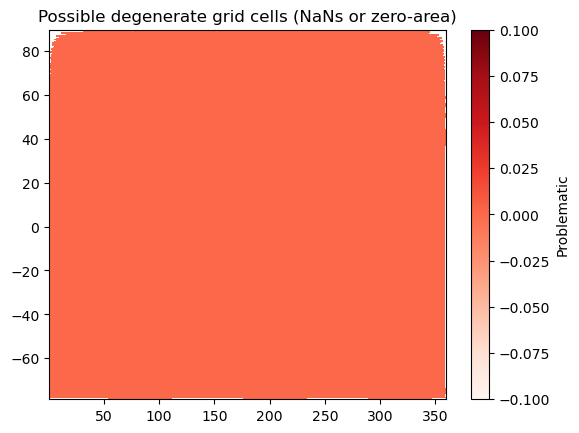

In [26]:
import numpy as np

# NaNs in lat/lon
nan_mask = np.isnan(lat2d) | np.isnan(lon2d)
print(f"{nan_mask.sum()} grid points contain NaNs")

# Check for repeated points: e.g. zero cell area
# This is a rough proxy — more useful with cell bounds
dy, dx = np.gradient(lat2d), np.gradient(lon2d)
degenerate_mask = (np.abs(dy[0]) < 1e-6) & (np.abs(dx[1]) < 1e-6)
import matplotlib.pyplot as plt

plt.figure()
plt.pcolormesh(lon2d, lat2d, nan_mask | degenerate_mask, cmap='Reds')
plt.title("Possible degenerate grid cells (NaNs or zero-area)")
plt.colorbar(label='Problematic')


In [18]:
data = ds_native['ph']  # shape (y, x) or (z, y, x)
data = data.where(np.isfinite(data), drop=False)
data

<xarray.DataArray 'ph' (i: 292, j: 362)> Size: 423kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(292, 362), dtype=float32)
Coordinates:
    time     object 8B 1850-01-16 12:00:00
    lev      float64 8B 0.5126
  * i        (i) int32 1kB 0 1 2 3 4 5 6 7 8 ... 284 285 286 287 288 289 290 291
  * j        (j) int32 1kB 0 1 2 3 4 5 6 7 8 ... 354 355 356 357 358 359 360 361
    lat      (i, j) float64 846kB -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
    lon      (i, j) float64 846kB 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
Attributes:
    standard_name:  sea_water_ph_reported_on_total_scale
    long_name:      pH
    comment:        negative log of hydrogen ion concentration with the conce...
    units:          1
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello

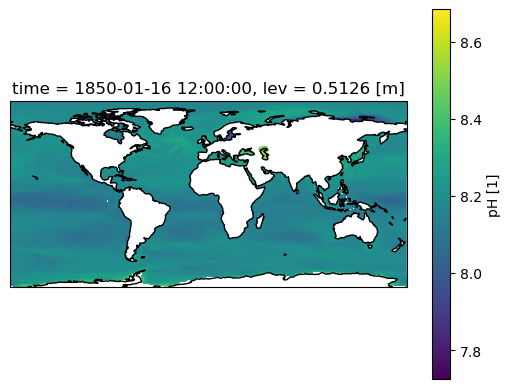

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ds_native.ph.plot(ax=ax)
ds_native['ph'].plot.pcolormesh(ax=ax, x="lon", y="lat")

ax.coastlines()

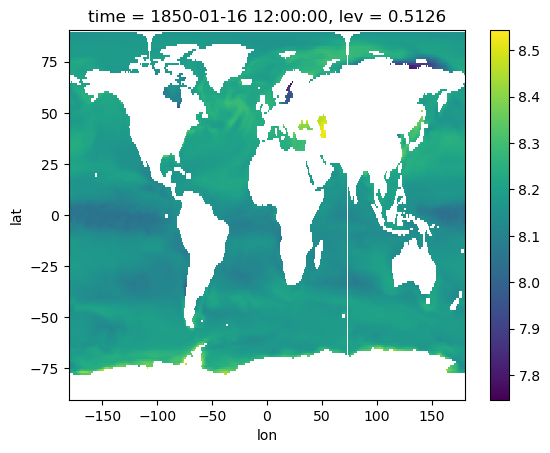

In [24]:
data_interp.plot()

In [2]:
ds_native.nbytes

8881800

In [2]:
regridder = xe.Regridder(
    ds_native, grid_out, method='bilinear',
    periodic=True,  # True if data crosses the date line
)

: 

In [3]:
def generate_remap_info(eg_nc, resolutions: tuple[float] = None):
    # standardise names to extract values
    rename_mapping = {
        "lat": "latitude",
        "lon": "longitude",
        "y": "latitude",
        "x": "longitude",
    }
    for coord, new_coord in rename_mapping.items():
        if new_coord not in eg_nc.coords and coord in eg_nc.coords:
            eg_nc = eg_nc.rename({coord: new_coord})

    # [-180, 180] longitudinal range
    max_lon = np.max(eg_nc.longitude.values)
    min_lon = np.min(eg_nc.longitude.values)
    if max_lon > 180:  # no better way to check this without providing explicit argument
        min_lon -= 180
    else:
        min_lon = np.min(eg_nc.longitude.values)
    min_lat = np.min(eg_nc.latitude.values)
    xfirst = min_lon
    yfirst = min_lat

    # xsize = int(360 / resolution)
    # # [smallest latitude, largest latitude] range
    # ysize = int((180 / resolution) + yfirst)

    lat_range = np.max(eg_nc.latitude.values) - np.min(eg_nc.latitude.values)
    lon_range = np.max(eg_nc.longitude.values) - np.min(eg_nc.longitude.values)

    if not resolutions:  # keep at original resolution
        coord_shape = eg_nc.latitude.shape
        if len(coord_shape) == 2:
            num_xcells = coord_shape[1]
            num_ycells = coord_shape[0]
        else:
            num_xcells = len(eg_nc.latitude.values)
            num_ycells = len(eg_nc.longitude.values)

        lat_res = lat_range / num_ycells
        lon_res = lon_range / num_xcells
    else:
        lat_res, lon_res = resolutions

    xsize = int(lon_range / lon_res)
    ysize = int(lat_range / lat_res)

    xinc, yinc = lon_res, lat_res

    # xsize = (np.max(eg_nc.longitude.values)-np.min(eg_nc.longitude.values))/num_xcells
    # ysize = (np.max(eg_nc.longitude.values)-np.min(eg_nc.longitude.values))/num_ycells

    # x_inc, y_inc = resolution, resolution

    return xsize, ysize, xfirst, yfirst, xinc, yinc


import xarray as xa
import numpy as np
ds = xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-186912.nc")

generate_remap_info(ds)

(362,
 292,
 np.float64(-179.95019866898656),
 np.float64(-78.57994842529297),
 np.float64(0.9943235711354083),
 np.float64(0.5764442339335403))

In [8]:
ds.latitude

<xarray.DataArray 'latitude' (i: 292, j: 362)> Size: 846kB
array([[-78.393501, -78.393501, -78.393501, ..., -78.393501, -78.393501,
        -78.393501],
       [-78.190582, -78.190582, -78.190582, ..., -78.190582, -78.190582,
        -78.190582],
       [-77.984169, -77.984169, -77.984169, ..., -77.984169, -77.984169,
        -77.984169],
       ...,
       [ 50.00502 ,  50.00502 ,  50.224403, ...,  50.224403,  50.00502 ,
         50.00502 ],
       [ 50.010941,  50.010941,  50.229362, ...,  50.229362,  50.010941,
         50.010941],
       [ 50.010941,  50.010941,  50.229362, ...,  50.229362,  50.010941,
         50.010941]], shape=(292, 362))
Coordinates:
    lev        float64 8B ...
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 284 285 286 287 288 289 290 291
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
    latitude   (i, j) float64 846kB -78.39 -78.39 -78.39 ... 50.23 50.01 50.01
    longitude  (i, j) float64 846kB 72.5 73.5 74.5 75.5 ... 73.04 73.0 72.99
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:         vertices_latitude

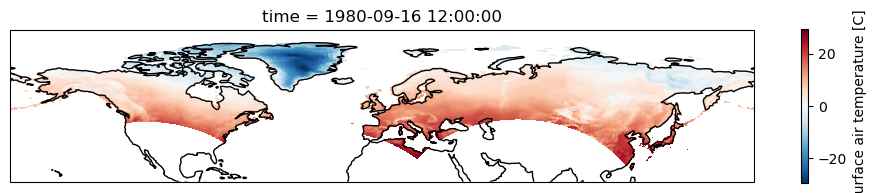

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

ds = xr.tutorial.open_dataset(
    "rasm"
)  # use xr.tutorial.load_dataset() for xarray<v0.11.0
dr = ds["Tair"]
plt.figure(figsize=(12, 2))
ax = plt.axes(projection=ccrs.PlateCarree())
dr[0].plot.pcolormesh(ax=ax, x="xc", y="yc")
ax.coastlines()

Text(0, 0.5, 'lat')

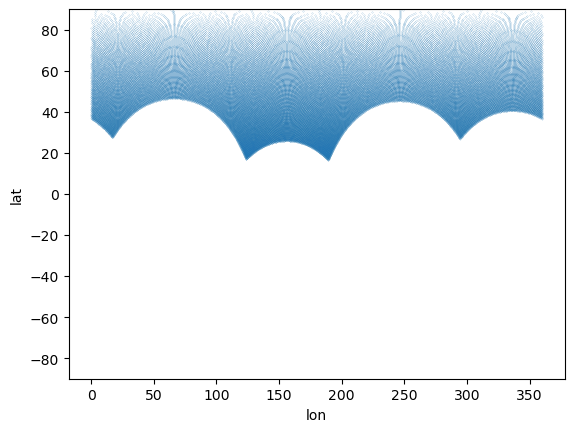

In [ ]:
plt.scatter(ds["xc"], ds["yc"], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel("lon")
plt.ylabel("lat")

In [16]:
ds = ds.rename({"xc": "lon", "yc": "lat"})
print(ds.nbytes / (1024 ** 3))  # Convert bytes to GB)

0.01596127450466156


In [18]:
ds_out = xe.util.grid_global(5, 4)
regridder = xe.Regridder(ds, ds_out, "bilinear")


In [20]:
dr_out = regridder(dr)
dr_out

<xarray.DataArray (time: 36, y: 45, x: 72)> Size: 933kB
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], shape=(36, 45, 72))
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    lon      (y, x) float64 26kB -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    lat      (y, x) float64 26kB -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [23]:
ds

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    lon      (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    lat      (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 16MB ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

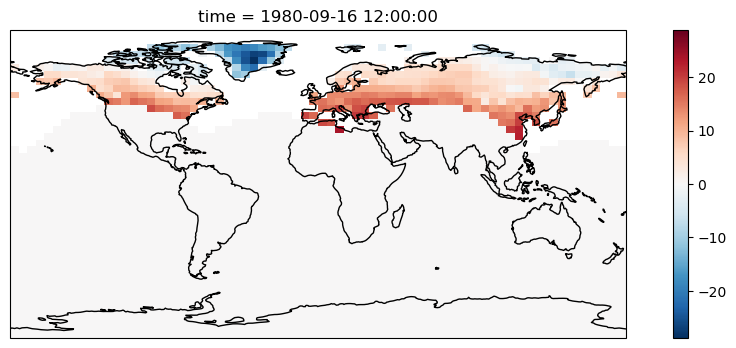

In [21]:
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out[0].plot.pcolormesh(ax=ax, x="lon", y="lat")
ax.coastlines()

In [ ]:
import xesmf as xe
ds_test = ph
# Infer target grid: use min/max/mean resolution from data
lat = ds_test["lat"] if "lat" in ds_test else ds_test["latitude"]
lon = ds_test["lon"] if "lon" in ds_test else ds_test["longitude"]
dlat = float(abs(lat[1] - lat[0]))
dlon = float(abs(lon[1] - lon[0]))
new_lat = np.arange(float(lat.min()), float(lat.max())+dlat, dlat)
new_lon = np.arange(float(lon.min()), float(lon.max())+dlon, dlon)
target_grid = xa.Dataset({
    "lat": ("lat", new_lat),
    "lon": ("lon", new_lon),
})
# Use xesmf for regridding
regridder = xe.Regridder(ds_test, target_grid, "bilinear", reuse_weights=True)
ds_test_out = regridder(ds_test)
# ds_test_out.to_netcdf(out_file)
# processed.add(ncfile)
# found_new = True

In [ ]:
import cartopy.crs as ccrs
plt.figure(figsize=(12, 2))
ax = plt.axes(projection=ccrs.PlateCarree())
ph['ph'].isel(time=0).plot.pcolormesh(ax=ax, x="longitude", y="latitude")
ax.coastlines()

In [ ]:
ph

In [ ]:
plt.scatter(ph["longitude"], ph["latitude"], s=0.01)  # plot grid locations


In [ ]:
import matplotlib.pyplot as plt
plt.plot(ph.latitude.values)

In [ ]:
xa.open_dataset("https://esg1.umr-cnrm.fr/thredds/fileServer/CMIP6_CNRM/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r10i1p1f2/Omon/ph/gn/v20200117/ph_Omon_CNRM-ESM2-1_historical_r10i1p1f2_gn_185001-189912.nc", engine='h5netcdf', decode_times=True, chunks={'time': 2})

In [ ]:
total_chunks = 0
for v in ds.data_vars.values():
    if hasattr(v.data, 'chunks') and v.data.chunks:
        total_chunks += sum([len(c) for c in v.data.chunks])
        
total_chunks

In [ ]:
92*

In [ ]:
xa.open_dataset("https://esgf.ceda.ac.uk/thredds/fileServer/esg_cmip6/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Omon/ph/gn/v20210114/ph_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_191001-192912.nc", engine='h5netcdf', decode_times=True, chunks={})

In [ ]:
import dask
from dask.diagnostics import ProgressBar

with ProgressBar():
    d.load()

In [ ]:
results_df

In [ ]:
# for each institution_id, source_id, experiment_id, select the first three member_ids
top_n = 3
grouped = results_df.groupby(['institution_id', 'source_id', 'experiment_id'])['member_id'].apply(lambda x: x.unique()[:top_n]).reset_index()


In [ ]:
egfp = "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/rapid_cmipper/cmipper/.esgpull/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Omon/tos/gn/v20200630/tos_Omon_TaiESM1_historical_r1i1p1f1_gn_185001-185012.nc"

ds = xa.open_dataset(egfp)
ds

In [ ]:
results_df.dataset_id.unique()

In [ ]:
### pipeline

# set up a yaml file with the search criteria

# load in yaml

# search for files using the criteria

# check that, if all else is identical in local_path (before version type), get the latest version

# get the highest resolution of each file (can't just define 25 km for all, as some files e.g. nutrients, are at lower resolutions)

# TODO: check form of opendap URL

# get list of file URLs

# parallelise downloading of files

In [ ]:
xa.open_dataset("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/esgpullplus/tos_Omon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc").isel(time=0).tos.plot()

In [ ]:
search_criteria

In [ ]:


clean_and_join_criteria(search_criteria)

In [ ]:
fs = api.esg.fs

# Reconstruct File objects from your DataFrame rows
# files = [File(**row) for _, row in results_df.iterrows()]

In [ ]:
fs.auth.parent

In [ ]:
xa.open_dataset(urls[0], engine="h5netcdf")

In [ ]:
# get a list of urls for files which have the same local_path
import xarray as xa
out = xa.open_mfdataset(results_df[results_df['local_path'] == results_df['local_path'].iloc[0]]['url'].tolist()[:2], engine='h5netcdf').isel(lev=0).load()

In [ ]:
new_url = ("https://esg-dn2.nsc.liu.se/thredds/fileServer/esg_dataroot1/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/rsdo/gn/v20200918/rsdo_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc"
"?rsdo[0:2][0:3][0:4]")

dap_url = new_url.replace("https://", "dap2://").replace("http://", "dap2://").replace("fileServer", "dodsC").split("?")[0]
dap_url

In [ ]:
xa.open_dataset(dap_url, engine='pydap')

In [ ]:
out = xa.open_mfdataset(results_df[results_df['local_path'] == results_df['local_path'].iloc[0]]['url'].tolist()[:3], engine='pydap')

In [ ]:
# 1.25min with lev=0 subset. Only a little longer
data = xa.open_dataset("https://esg-dn2.nsc.liu.se/thredds/fileServer/esg_dataroot1/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/rsdo/gn/v20200918/rsdo_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc", engine="h5netcdf").load()

In [ ]:
data.to_netcdf("rsdo_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc", format="NETCDF4")

In [ ]:
xa.open_dataset("rsdo_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc")

In [ ]:
import xarray as xa

xa.open_dataset("https://esg-dn2.nsc.liu.se/thredds/fileServer/esg_dataroot1/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/rsdo/gn/v20200918/rsdo_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc", engine="h5netcdf").rsdo.isel(time=0).sel(i=slice(0,100), j=slice(0,100)).mean(dim=["i", "j"]).plot()

## 2. Add a Query to the Database

Add a query to esgpull's database using the same criteria, but include a unique 'name' field. This name will be used as the query_id for tracking, updating, and downloading.

In [ ]:
[list(q.values())[0] for q in api.list_queries()]

In [ ]:
query_name = "my_cmip6_tas_historical_demoasdf"
add_criteria = dict(search_criteria)
add_criteria["name"] = query_name
add_criteria.pop("limit", None)

api.add(criteria=add_criteria, track=False)
# print(f"Query '{query_name}' added to the database.")

In [ ]:
api.list_queries()

In [ ]:
api.track_query(query_ids=["ec94d5"])

## 3. Track the Query (Optional)

Mark the query for automatic tracking (so it will be updated by esgpull's scheduler, if running).

## 4. Update the Query

Update the query to fetch the latest list of files from ESGF and link them to the query in the database.

In [ ]:
# api.update(query_id=query_name)
query_name = "aec421"
# Update a tracked query and get new files as dicts
new_files = api.update(query_id=query_name)
print(f"Added {len(new_files)} new files.")
if new_files:
    print(json.dumps(new_files[0], indent=2))

In [ ]:
query_name = "aec421"
updated_files = api.update(query_id=query_name)
print(f"Update complete. {len(updated_files)} files are now associated with '{query_name}'.")
if updated_files:
    print("Sample file info:")
    for file_info in updated_files[:3]:
        print(json.dumps(file_info, indent=2))

## 5. Download Files for the Query

Download all files in 'queued' state for this query. The files will be saved to the directory specified in your esgpull config.

In [ ]:
downloaded = api.download(query_id=query_name)
print(f"Download complete. {len(downloaded)} files processed.")
if downloaded:
    print("Sample downloaded file info:")
    for file_info in downloaded[:3]:
        print(json.dumps(file_info, indent=2))

## 6. List and Inspect Queries

You can list all queries in the database or get details for a specific query.

In [ ]:
all_queries = api.list_queries()
print(f"Total queries in database: {len(all_queries)}")
if all_queries:
    print("First query:")
    print(json.dumps(all_queries[0], indent=2))

query_info = api.get_query(query_id=query_name)
print(f"\nDetails for query '{query_name}':")
print(json.dumps(query_info, indent=2))